# Children analysis

In [84]:
# Importing all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import shapiro

In [85]:
# Reading the CSV file into a DataFrame, also placing the right file path
df = pd.read_csv(r'C:\Users\alvarocairo\Insurance.csv')

# Display the DataFrame
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.55
1334,18,female,31.9,0,0,northeast,2205.98
1335,18,female,36.9,0,0,southeast,1629.83
1336,21,female,25.8,0,0,southwest,2007.95


#### Data exploration
##### Examining the distribution of children to better understand the data.
- Make preliminary observations about the data.
- Identify any potential imbalances.

In [86]:
# Use the 'value_counts' function to count occurrences of each number of children
child_counts = df['children'].value_counts()

# Print the results
print(child_counts)

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


##### Comparing means to check whether the average values differ significantly between the groups. 
- A significant difference in means could suggest a difference in central tendency.

In [87]:
# Group the data by the 'children' column and calculate the mean expenses for each group
mean_expenses_per_child = df.groupby('children')['expenses'].mean()

# Print the results
print(mean_expenses_per_child)

children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64


##### Visualization using a histogram.

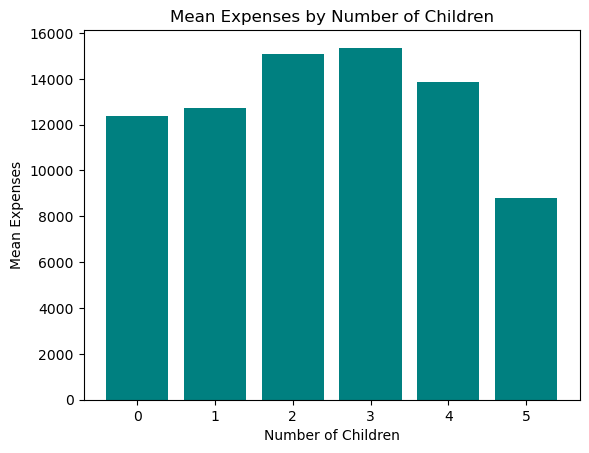

In [88]:
# Define color
color = ['teal']

# Create a histogram
plt.bar(mean_expenses_per_child.index, mean_expenses_per_child.values, color=color)
plt.xlabel('Number of Children')
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses by Number of Children')
plt.xticks(mean_expenses_per_child.index)
plt.show()

##### Checking the mean difference between having no children (0) or having children (1 to 5).
- Making it visual using a Histogram.

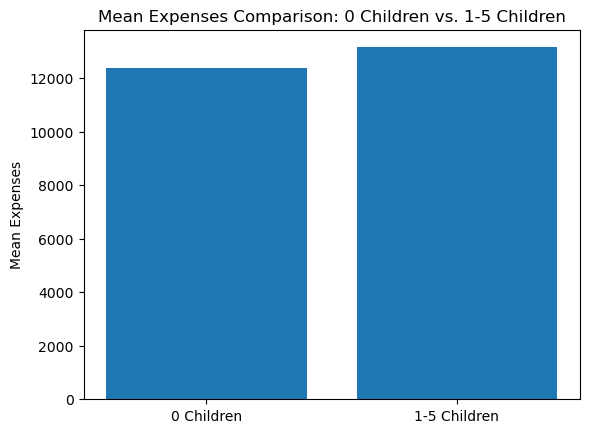

In [89]:
# Create a new group for 1 to 5 children and calculate the mean expenses
mean_expenses_1_to_5_children = mean_expenses_per_child.loc[1:5].mean()

# Create a histogram comparing 0 children to the mean of 1 to 5 children
plt.bar(['0 Children', '1-5 Children'], [mean_expenses_per_child[0], mean_expenses_1_to_5_children])
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses Comparison: 0 Children vs. 1-5 Children')
plt.show()

##### Comparing medians to assess whether the typical value in one group differs from the typical value in the other groups. 
- This is particularly useful when dealing with skewed or non-normally distributed data.

In [105]:
# Group the data by the 'children' column and calculate the median expenses for each group
median_expenses_per_child = df.groupby('children')['expenses'].median()

# Print the results
print(median_expenses_per_child)

children
0     9856.950
1     8483.870
2     9264.980
3    10600.550
4    11033.660
5     8589.565
Name: expenses, dtype: float64


##### Using a heatmap to explore how insurance expenses are distributed by number of children and region.
- Also to gain a better understanding of the relationships within the dataset.

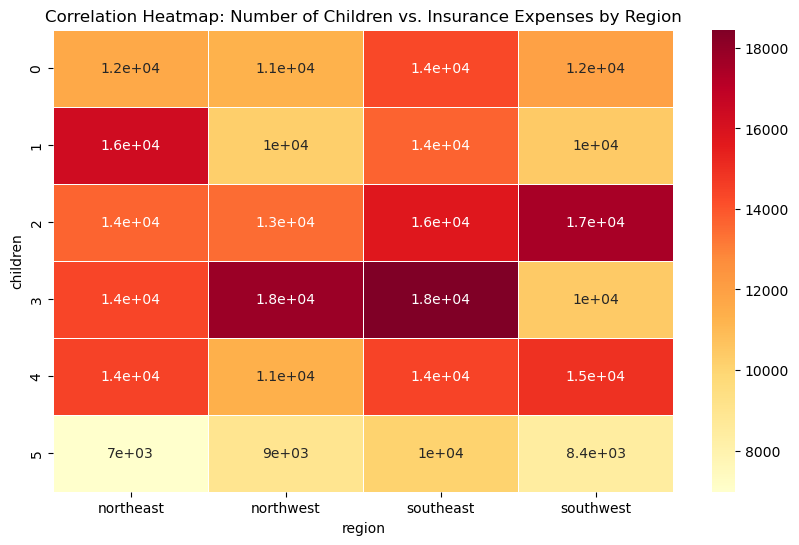

In [90]:
# Create a pivot table to reshape the data for the heatmap
pivot_data = df.pivot_table(index='children', columns='region', values='expenses')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', linewidths=.5)
plt.title('Correlation Heatmap: Number of Children vs. Insurance Expenses by Region')
plt.show()

# Sub-question 5: Is there a connection between the number of children and insurance expenses?
- H0: Having children does not affect the insurance expenses (=0).
- Ha: Having children does affect the insurance expenses (0>).

### Indepent Samples T-Test

In [91]:
# Assumptions for Independent Samples T-Test

# 1. Independence Assumption:
# The observations in the 'no children' and 'children' groups are independent of each other.

# 2. Random Sample Assumption:
# The data is collected through a random sampling method to ensure that it represents the larger population from which it is drawn.

In [92]:
# 3. Normality Assumption:
# Check the normality of data distribution for both 'no children' and 'children' groups.

# Create a group 'no_children' for 'children' == 0
no_children_group = df[df['children'] == 0]

# Create a group 'children' for 'children' > 0
children_group = df[df['children'] > 0]

In [93]:
# Perform the Shapiro-Wilk test for normality on the 'expenses' column for both groups
statistic_no_children, p_value_no_children = stats.shapiro(no_children_group['expenses'])
statistic_children, p_value_children = stats.shapiro(children_group['expenses'])

# Print the results
print("Shapiro-Wilk Test for 'no_children' group:")
print("Statistic:", statistic_no_children, "p-value:", p_value_no_children)

print("Shapiro-Wilk Test for 'children' group:")
print("Statistic:", statistic_children, "p-value:", p_value_children)

Shapiro-Wilk Test for 'no_children' group:
Statistic: 0.8168937563896179 p-value: 4.92953164608208e-25
Shapiro-Wilk Test for 'children' group:
Statistic: 0.7925188541412354 p-value: 4.344345001994977e-30


- The p-values for both groups are greater than the chosen significance level of 0.05. 
- This means that there is insufficient evidence to conclude that the 'expenses' column is not normally distributed within each group.

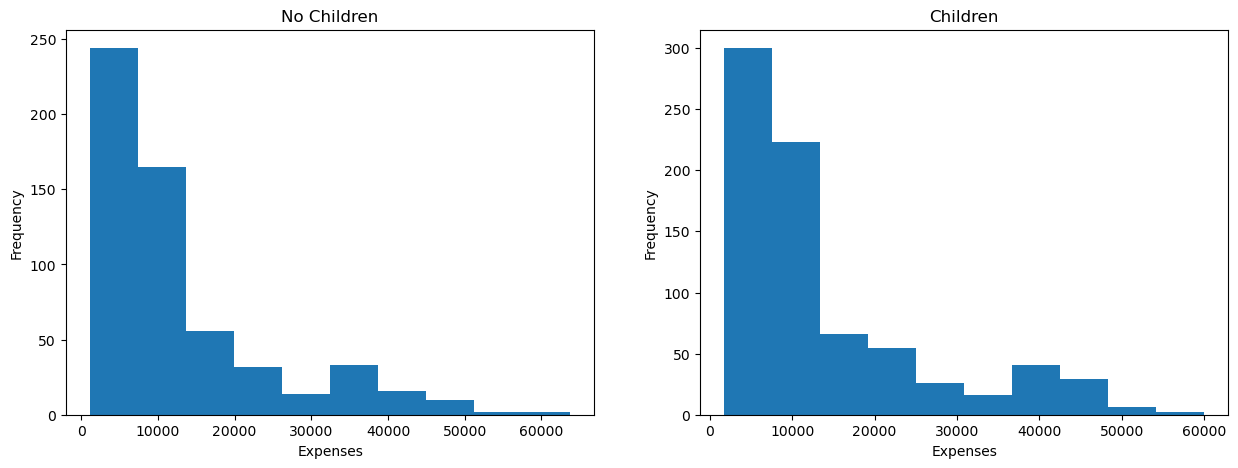

In [94]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot a histogram for the 'no_children' group on the first subplot
axs[0].hist(no_children_group['expenses'], bins=10)
axs[0].set_title('No Children')
axs[0].set_xlabel('Expenses')
axs[0].set_ylabel('Frequency')

# Plot a histogram for the 'children' group on the second subplot
axs[1].hist(children_group['expenses'], bins=10)
axs[1].set_title('Children')
axs[1].set_xlabel('Expenses')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.show()

- Trying to recognize a normal distribution in the groups using a histogram.

In [95]:
# 4. Homogeneity of Variance : 
# The variances of the two groups being compared should be approximately equal.

# Extract the 'expenses' column from the DataFrame
no_children_expenses = no_children_group['expenses']
children_expenses = children_group['expenses']

# Perform Levene's test for homogeneity of variances
levene_statistic, levene_p = stats.levene(no_children_expenses, children_expenses)

print(f"Levene's test: Statistic={levene_statistic}, p-value={levene_p}")

Levene's test: Statistic=0.35167596125566974, p-value=0.5532663073122761


- Concluding from the results of the Levene's test, we can say that the data does not provide strong evidence to suggest that the 'expenses' column has different variances within each group.

In [96]:
# Separate data into two groups: 0 children and 1 to 5 children
expenses_0_children = df[df['children'] == 0]['expenses']
expenses_1_to_5_children = df[(df['children'] >= 1) & (df['children'] <= 5)]['expenses']

# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(expenses_0_children, expenses_1_to_5_children)

# Print the results
print("Independent Samples t-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance at a significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("The difference in mean expenses is statistically significant.")
else:
    print("There is no statistically significant difference in mean expenses.")


Independent Samples t-test Results:
t-statistic: -2.3721
P-value: 0.0178
The difference in mean expenses is statistically significant.


- The t-statistic of -2.3721, which is a negative value suggests that, on average, having no children results in  lower insurance expenses compared to having children.
- The p-value of 0.0178 is less than the significance level of 0.05, suggesting that there's evidence to reject the null hypothesis. 
- In other words, it indicates that having children does have a statistically significant effect on insurance expenses. This statement supports Ha.

#### Analysis of Variance (ANOVA)

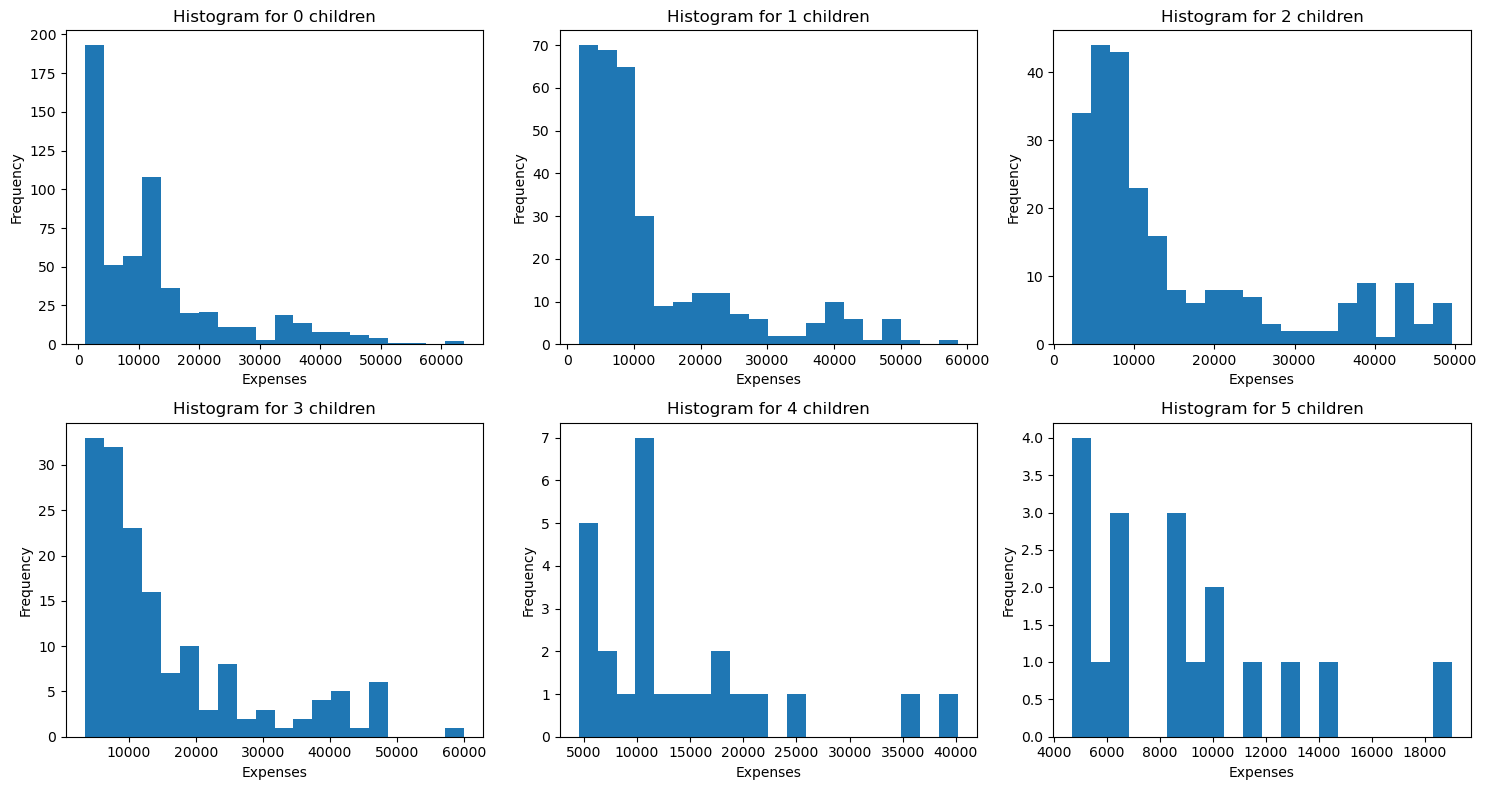

In [98]:
# Anova assumptions: 
# Assumption 1: Independence
# The observations within and between groups are independent.

# Assumption 2: Normality
# Check that the data within each group follow a normal distribution by using a histogram.

# Create a separate histogram for each number of children (0 to 5)

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows and 3 columns for 6 histograms

# Create a separate histogram for each number of children (0 to 5) in subplots
for num_children, ax in zip(range(6), axes.flatten()):
    ax.hist(df[df['children'] == num_children]['expenses'], bins=20)
    ax.set_title(f'Histogram for {num_children} children')
    ax.set_xlabel('Expenses')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the histograms
plt.show()


In [99]:
# Create a list of p-values for normality tests for each group
p_values = []

for i in range(6):
    group_data = df[df['children'] == i]['expenses']
    _, p_value = shapiro(group_data)
    p_values.append(p_value)

# Set the significance level
alpha = 0.05

# Check if all p-values are above the significance level
if all(p > alpha for p in p_values):
    print("All groups follow a normal distribution.")
else:
    print("At least one group does not follow a normal distribution.")

# Optionally, you can also print the p-values for each group
for i, p_value in enumerate(p_values):
    print(f"Group {i} p-value: {p_value:.4f}")

At least one group does not follow a normal distribution.
Group 0 p-value: 0.0000
Group 1 p-value: 0.0000
Group 2 p-value: 0.0000
Group 3 p-value: 0.0000
Group 4 p-value: 0.0007
Group 5 p-value: 0.0401


- From both the p-value and the histograms we can conclude that none of the groups follow a normal distribution. 
- The very low p-values indicate that there's strong evedicent againt the null hypothesis that the data is normally distributed.

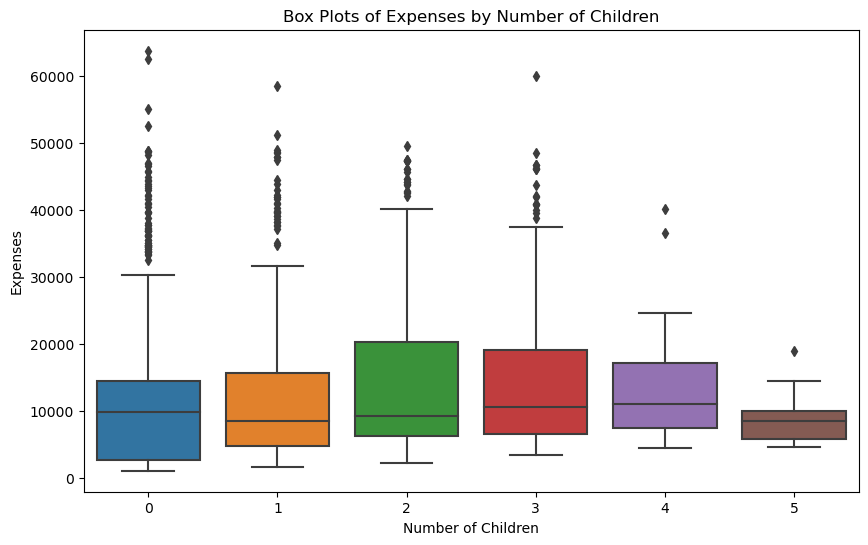

In [100]:
# Assumption 3: Homogeneity of Variance
# Check if the variances within each group are roughly equal through visual inspection (box plots).

# Create box plots for each number of children
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.boxplot(x='children', y='expenses', data=df)

plt.title('Box Plots of Expenses by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Expenses')

plt.show()

- The visualization above through boxplots shows the variances between groups.

In [101]:
# Assumption 4: Equal variance: hypothesis testing
# Levene test

from scipy.stats import levene

# Create an empty list to store Levene test results
levene_results = []

# Iterate through each number of children and perform the Levene test
for children_count in range(6):  # 0 to 5 children
    group = df[df['children'] == children_count]['expenses']
    levene_results.append(group)

# Perform the Levene test for all groups
statistic, p_value = levene(*levene_results)

# Display the Levene test results
print("Levene Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("At least one group has significantly different variance (reject null hypothesis)")
else:
    print("Variances are not significantly different among groups (fail to reject null hypothesis)")


Levene Statistic: 2.0832669968072866
P-value: 0.0649715232416075
Variances are not significantly different among groups (fail to reject null hypothesis)


- Looking at the Levene statistic and the p-value we can conclude that the variances are not significantly different among groups.
- This means we fail to reject null hypothesis.

In [102]:
# Group the data by the 'children' column and collect expenses for each group
groups = [df[df['children'] == i]['expenses'] for i in range(6)]

# Perform ANOVA --> ANOVA not the right test, assumptions weren't met
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("Analysis of Variance (ANOVA) Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Check for statistical significance at a significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in mean expenses among the groups.")
else:
    print("There is no statistically significant difference in mean expenses among the groups.")

Analysis of Variance (ANOVA) Results:
F-statistic: 3.2969
P-value: 0.0058
There is a statistically significant difference in mean expenses among the groups.


- The values of both the F-statistic (3.2969) and the p-value (0.0058) indicate that there is a statistically significant difference in mean expenses among the groups.

### Bonferroni's T-Test
- One-way ANOVA tells us that the means of different groups are all equal or not equal, but the test gives no information about how they differ, in particular about which pairs are significantly different. 
- In reallife cases we are more inserted in knowing which pairs of groups are different.

- Bonferroni's test: Performs pair-wise t-tests for k null hypoethesis and gaurantees an overall Type I error rate of alpha by testing each null hypothesis at a significance level of alpha.

- The output from this method tells us whether to reject or not the pair-wise t-tests.

In [103]:
# Now performing Post hoc method: Bonferroni's test

import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

# Create a MultiComparison object for the expenses data grouped by 'children'
mc = MultiComparison(df['expenses'], df['children'])

# Perform the Bonferroni post hoc test
result = mc.allpairtest(stats.ttest_ind, method='b')

# Display the Bonferroni post hoc test results
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=b
alphacSidak=0.00, alphacBonf=0.003
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
     0      1 -0.4397 0.6602       1.0  False
     0      2 -2.8672 0.0042    0.0637  False
     0      3 -2.7454 0.0062    0.0929  False
     0      4 -0.6096 0.5424       1.0  False
     0      5  1.2603  0.208       1.0  False
     1      2 -2.2381 0.0256    0.3841  False
     1      3 -2.2505 0.0249    0.3731  False
     1      4 -0.4626 0.6439       1.0  False
     1      5  1.4098 0.1595       1.0  False
     2      3 -0.2166 0.8286       1.0  False
     2      4   0.462 0.6445       1.0  False
     2      5  2.0592 0.0405    0.6074  False
     3      4  0.5845 0.5596       1.0  False
     3      5  2.2429 0.0262    0.3926  False
     4      5  2.2111 0.0327      0.49  False
---------------------------------------------


- The table shows that all the p-values are greater than the alpha, so the null hypothesis is not yet rejected. Therefore, there is insufficient evidence to conclude that having children affects insurance expenses at the 0.05 level of significance.

#### As the ANOVA results are not reliable because they do not meet the assumptions, we performed the Bonferroni test. This shows that there is insufficient evidence in these data to conclude that there is a different effect on insurance costs between the groups. 

#### However, looking at the result of the T-test, we can conclude that there is a significant influence between having no children and having children on insurance expenses.